🌱 PERFECT COCOA FARM SPATIAL ANALYSIS SYSTEM 🌱

📁 STEP 1: Loading Data
Loading data from: C:\Users\DELL\Downloads\Book1.xlsx
Detected Excel file. Loading...
Data loaded successfully!
Shape: (6639, 20)
Columns: ['Region', 'district', 'Farmer', 'farm_size_declared', 'volume_delivered_last_season', 'surface_mapped', 'nb_farms_2122', 'nb_pol_2122', 'gender', 'household_size', 'nb_farms', 'tot_cocoa_harvested_bags', 'tot_bags_sold_to_group', 'total_harvest_estimate', 'avg_productive_trees', 'tot_pods_count', 'take_gps__Latitude', 'take_gps__Longitude', 'take_gps__Accuracy', 'take_gps__Altitude']

🗺️  STEP 2: Mapping Columns
Mapping columns to standard names...
Column mapping completed:
  take_gps__Latitude -> latitude
  take_gps__Longitude -> longitude
  Region -> region
  district -> district
  volume_delivered_last_season -> volume
  farm_size_declared -> farm_size
  gender -> gender
  household_size -> household_size
  avg_productive_trees -> trees
  tot_pods_count -> pods
  take_gps__Ac

  File "e:\All files On desktop\Python_En\env\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


Optimal number of clusters: 8
Intelligent clustering analysis completed!

🔥 STEP 8: Productivity Hotspot Analysis
Conducting hotspot analysis...
Hotspot analysis completed!

🤖 STEP 9: Predictive Modeling Suite
Building comprehensive predictive models...
Building volume prediction model...
Volume model R²: 0.588, RMSE: 353.91
Building yield prediction model...
Yield model R²: 0.618, RMSE: 37.56
Building productivity classification model...
Classification accuracy: 0.818
Predictive modeling suite completed!

🎨 STEP 10: Creating Stunning Visualizations
Creating stunning visualizations...


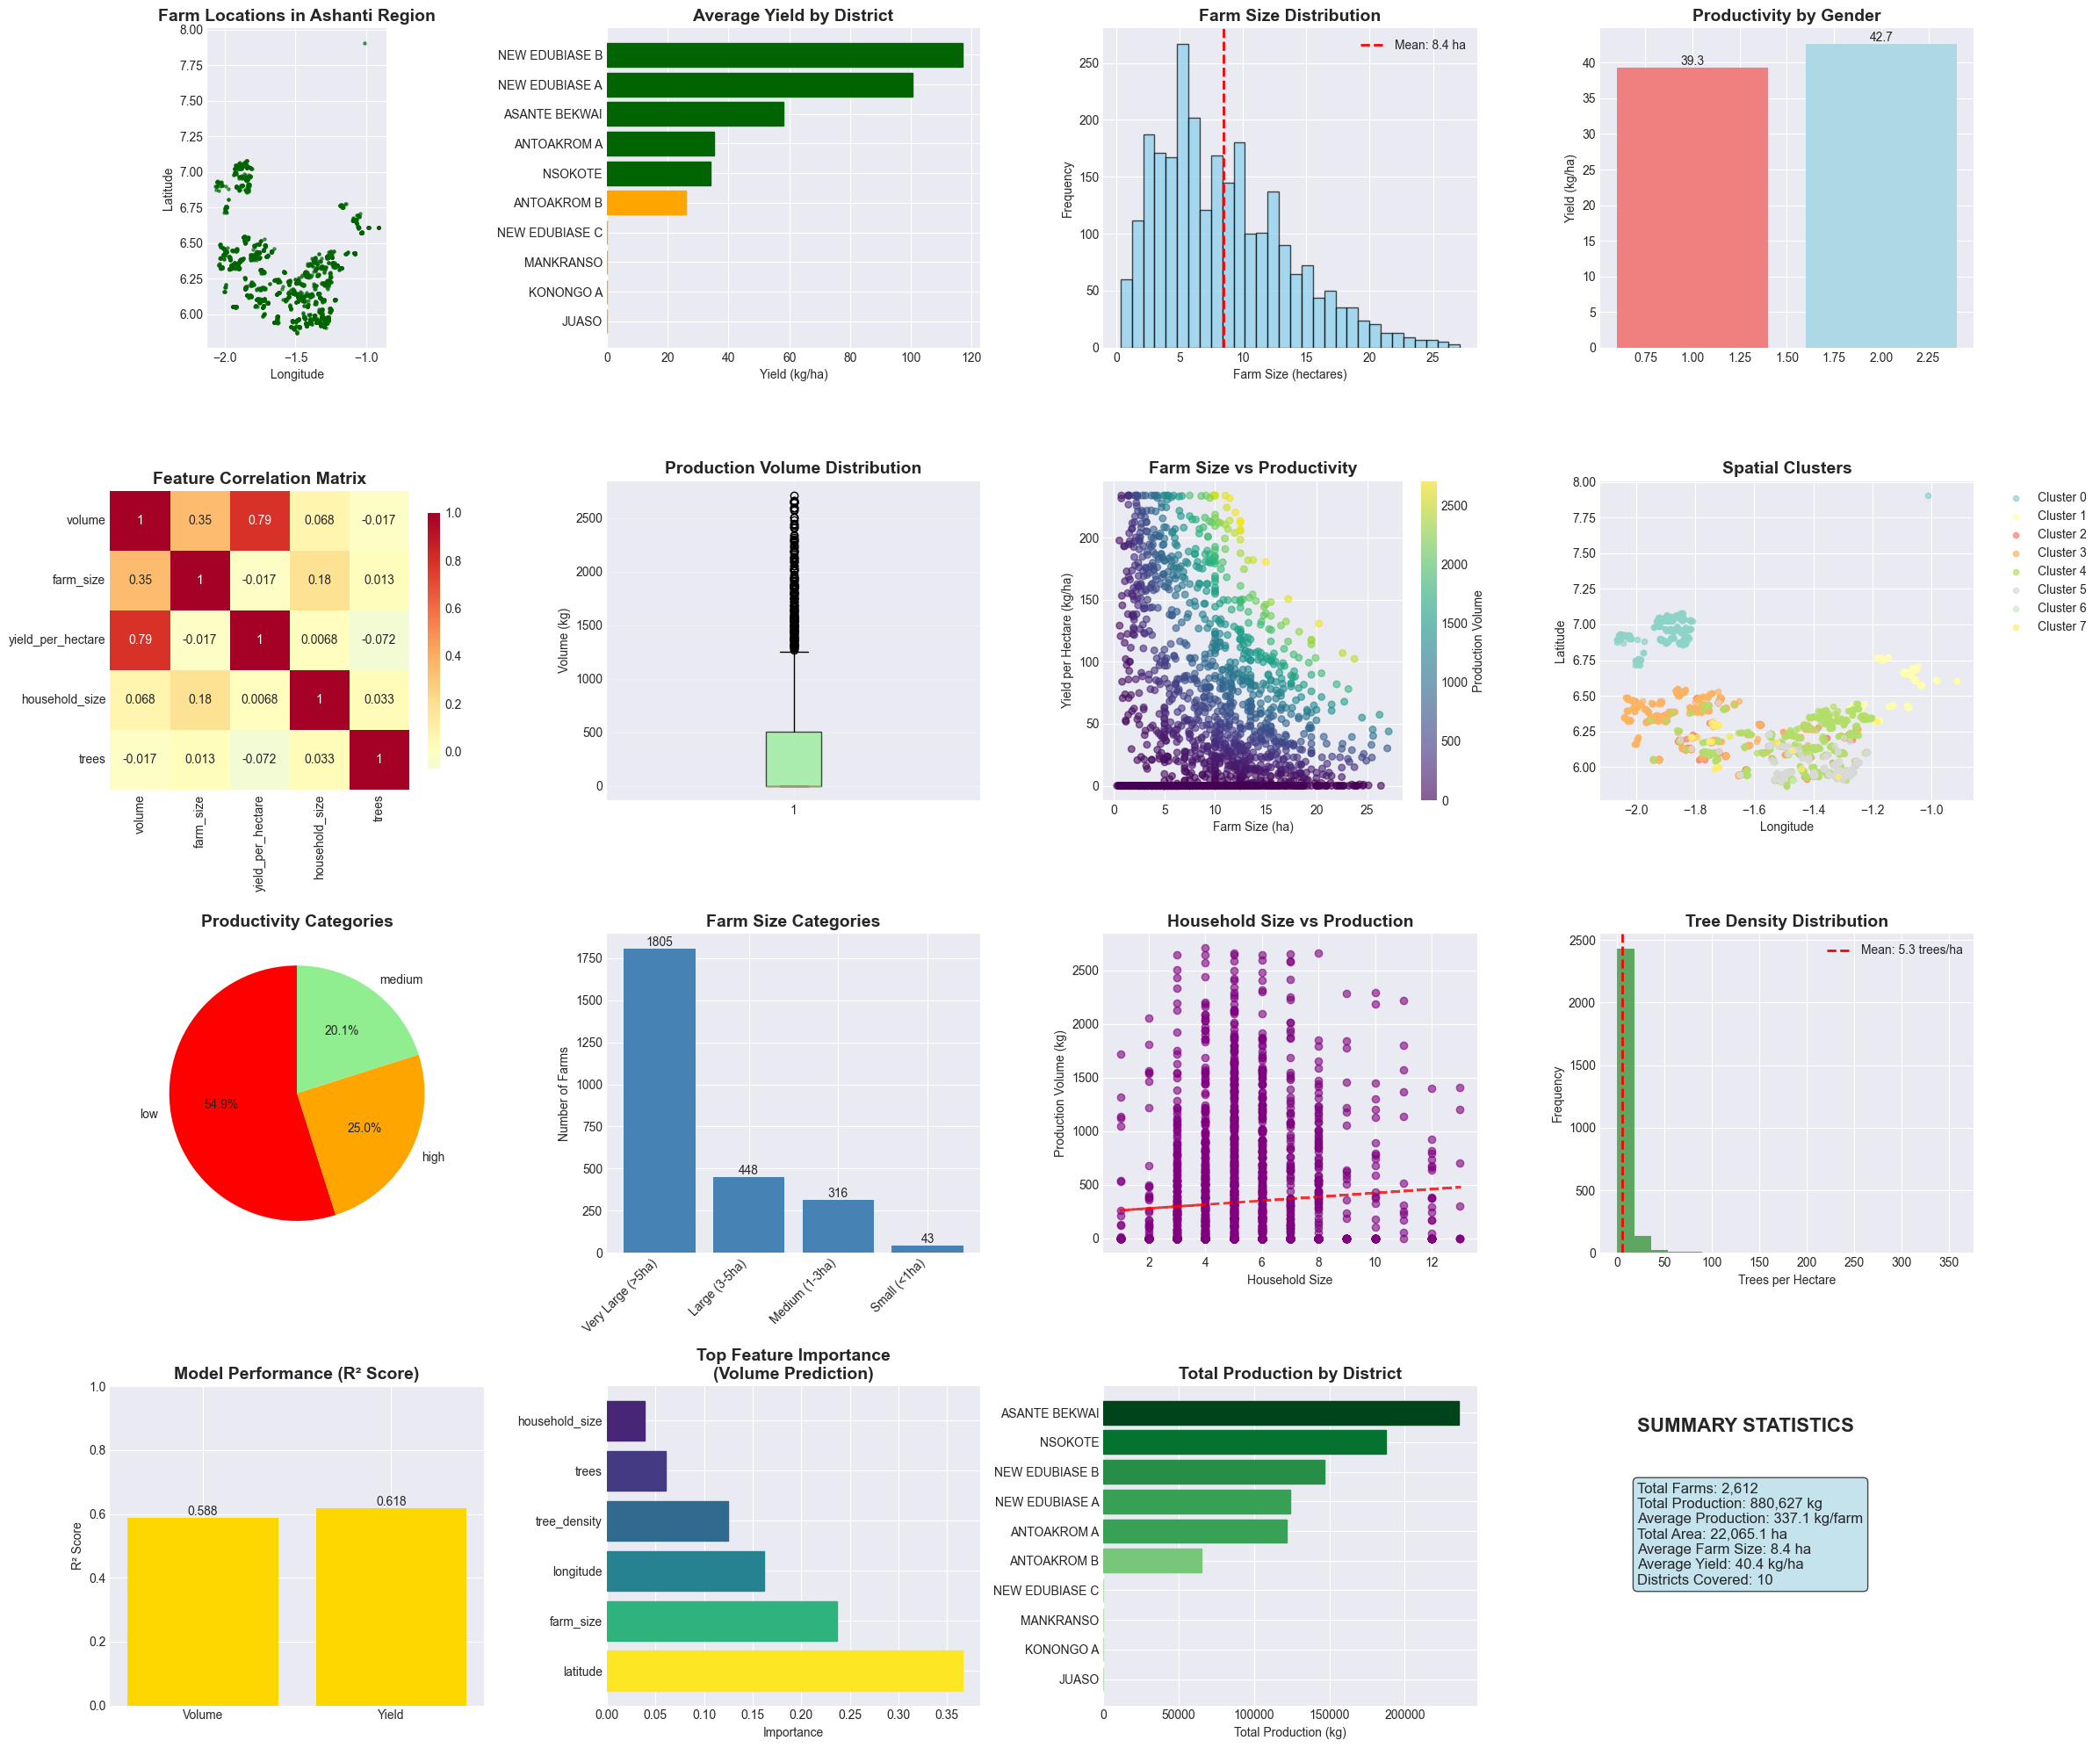

Stunning visualizations created and saved!

🗺️  STEP 11: Interactive Dashboard Creation
Creating interactive dashboard map...

❌ ERROR DURING ANALYSIS: Custom tiles must have an attribution.

❌ Analysis failed. Please check the error messages above.


Traceback (most recent call last):
  File "C:\Users\DELL\AppData\Local\Temp\ipykernel_34624\4132484335.py", line 1583, in run_perfect_analysis
    self.create_interactive_dashboard_map()
  File "C:\Users\DELL\AppData\Local\Temp\ipykernel_34624\4132484335.py", line 1013, in create_interactive_dashboard_map
    folium.TileLayer('Stamen Terrain', name='Terrain').add_to(m)
    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "e:\All files On desktop\Python_En\env\Lib\site-packages\folium\raster_layers.py", line 143, in __init__
    raise ValueError("Custom tiles must have an attribution.")
ValueError: Custom tiles must have an attribution.


In [ ]:
# Perfect Cocoa Farm Spatial Analysis System for Ashanti Region
# Enhanced version with Excel support and robust error handling

import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium import plugins
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
import os
import json
from datetime import datetime
warnings.filterwarnings('ignore')

# Spatial analysis libraries
try:
    from shapely.geometry import Point, Polygon
    from sklearn.cluster import KMeans, DBSCAN
    from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
    from sklearn.preprocessing import StandardScaler
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import classification_report, r2_score, mean_squared_error
    from scipy import stats
    from scipy.spatial.distance import pdist, squareform
    import networkx as nx
    from sklearn.decomposition import PCA
except ImportError as e:
    print(f"Some libraries not available: {e}")
    print("Install with: pip install scikit-learn scipy networkx")

class PerfectCocoaFarmAnalyzer:
    """
    Perfect Cocoa Farm Spatial Analysis System
    Handles Excel files, robust error handling, and comprehensive analysis
    """
    
    def __init__(self, file_path):
        self.file_path = file_path
        self.original_data = None
        self.data = None
        self.gdf = None
        self.analysis_results = {}
        self.output_dir = './perfect_cocoa_analysis/'
        
        # Create output directory
        os.makedirs(self.output_dir, exist_ok=True)
        
        # Column mapping for different naming conventions
        self.column_mapping = {
            'latitude': ['take_gps__Latitude', 'latitude', 'lat', 'Latitude', 'GPS_Latitude'],
            'longitude': ['take_gps__Longitude', 'longitude', 'lng', 'lon', 'Longitude', 'GPS_Longitude'],
            'region': ['Region', 'region', 'REGION'],
            'district': ['district', 'District', 'DISTRICT'],
            'volume': ['volume_delivered_last_season', 'volume', 'production', 'harvest_kg', 'yield_kg'],
            'farm_size': ['farm_size_declared', 'farm_size', 'area_ha', 'size_hectares', 'farm_area'],
            'gender': ['gender', 'Gender', 'farmer_gender'],
            'household_size': ['household_size', 'household', 'family_size'],
            'trees': ['avg_productive_trees', 'trees', 'tree_count', 'productive_trees'],
            'pods': ['tot_pods_count', 'pods', 'pod_count', 'total_pods'],
            'accuracy': ['take_gps__Accuracy', 'gps_accuracy', 'accuracy']
        }
    
    def detect_file_type_and_load(self):
        """
        Detect file type and load data accordingly
        """
        print(f"Loading data from: {self.file_path}")
        
        try:
            file_extension = os.path.splitext(self.file_path)[1].lower()
            
            if file_extension in ['.xlsx', '.xls']:
                # Handle Excel files
                print("Detected Excel file. Loading...")
                self.original_data = pd.read_excel(self.file_path, engine='openpyxl' if file_extension == '.xlsx' else 'xlrd')
            elif file_extension == '.csv':
                # Handle CSV files
                print("Detected CSV file. Loading...")
                # Try different encodings
                encodings = ['utf-8', 'latin-1', 'cp1252', 'iso-8859-1']
                for encoding in encodings:
                    try:
                        self.original_data = pd.read_csv(self.file_path, encoding=encoding)
                        print(f"Successfully loaded with {encoding} encoding")
                        break
                    except UnicodeDecodeError:
                        continue
                
                if self.original_data is None:
                    raise ValueError("Could not read CSV with any supported encoding")
            else:
                raise ValueError(f"Unsupported file format: {file_extension}")
            
            print(f"Data loaded successfully!")
            print(f"Shape: {self.original_data.shape}")
            print(f"Columns: {list(self.original_data.columns)}")
            
            return self.original_data
            
        except Exception as e:
            print(f"Error loading data: {str(e)}")
            return None
    
    def map_columns(self):
        """
        Map columns to standard names based on detected patterns
        """
        print("Mapping columns to standard names...")
        
        self.data = self.original_data.copy()
        mapped_columns = {}
        
        for standard_name, possible_names in self.column_mapping.items():
            for col in self.data.columns:
                if col in possible_names:
                    mapped_columns[col] = standard_name
                    break
            
            # If not found, try case-insensitive partial matching
            if standard_name not in mapped_columns.values():
                for col in self.data.columns:
                    for possible_name in possible_names:
                        if possible_name.lower() in col.lower() or col.lower() in possible_name.lower():
                            mapped_columns[col] = standard_name
                            break
                    if col in mapped_columns:
                        break
        
        # Rename columns
        reverse_mapping = {v: k for k, v in mapped_columns.items()}
        self.data.rename(columns=mapped_columns, inplace=True)
        
        print("Column mapping completed:")
        for original, mapped in mapped_columns.items():
            print(f"  {original} -> {mapped}")
        
        return mapped_columns
    
    def validate_essential_columns(self):
        """
        Validate that essential columns are present
        """
        print("Validating essential columns...")
        
        essential_columns = ['latitude', 'longitude']
        missing_columns = []
        
        for col in essential_columns:
            if col not in self.data.columns:
                missing_columns.append(col)
        
        if missing_columns:
            print(f"ERROR: Missing essential columns: {missing_columns}")
            print("Available columns:", list(self.data.columns))
            
            # Try to find GPS coordinates in any format
            lat_patterns = ['lat', 'latitude', 'gps']
            lon_patterns = ['lng', 'lon', 'longitude', 'long']
            
            lat_col = None
            lon_col = None
            
            for col in self.data.columns:
                col_lower = col.lower()
                if any(pattern in col_lower for pattern in lat_patterns) and 'lat' in col_lower:
                    lat_col = col
                if any(pattern in col_lower for pattern in lon_patterns) and ('lon' in col_lower or 'lng' in col_lower):
                    lon_col = col
            
            if lat_col and lon_col:
                print(f"Found GPS coordinates: {lat_col}, {lon_col}")
                self.data.rename(columns={lat_col: 'latitude', lon_col: 'longitude'}, inplace=True)
                return True
            else:
                return False
        
        print("All essential columns present!")
        return True
    
    def comprehensive_data_cleaning(self):
        """
        Comprehensive data cleaning with robust error handling
        """
        print("Starting comprehensive data cleaning...")
        
        initial_count = len(self.data)
        print(f"Initial record count: {initial_count}")
        
        # 1. Handle GPS coordinates
        print("Cleaning GPS coordinates...")
        
        # Remove rows with missing GPS coordinates
        before_gps = len(self.data)
        self.data = self.data.dropna(subset=['latitude', 'longitude'])
        print(f"Removed {before_gps - len(self.data)} records with missing GPS coordinates")
        
        # Convert GPS coordinates to numeric
        self.data['latitude'] = pd.to_numeric(self.data['latitude'], errors='coerce')
        self.data['longitude'] = pd.to_numeric(self.data['longitude'], errors='coerce')
        
        # Remove rows with invalid GPS coordinates
        before_numeric = len(self.data)
        self.data = self.data.dropna(subset=['latitude', 'longitude'])
        print(f"Removed {before_numeric - len(self.data)} records with invalid GPS coordinates")
        
        # 2. Validate GPS coordinates for Ghana
        print("Validating GPS coordinates for Ghana...")
        ghana_bounds = {
            'lat_min': 4.5, 'lat_max': 11.5,
            'lon_min': -3.5, 'lon_max': 1.5
        }
        
        before_bounds = len(self.data)
        self.data = self.data[
            (self.data['latitude'] >= ghana_bounds['lat_min']) &
            (self.data['latitude'] <= ghana_bounds['lat_max']) &
            (self.data['longitude'] >= ghana_bounds['lon_min']) &
            (self.data['longitude'] <= ghana_bounds['lon_max'])
        ]
        print(f"Removed {before_bounds - len(self.data)} records outside Ghana bounds")
        
        # 3. Filter for Ashanti region if region column exists
        if 'region' in self.data.columns:
            print("Filtering for Ashanti region...")
            before_region = len(self.data)
            ashanti_patterns = ['ashanti', 'ASHANTI', 'Ashanti']
            ashanti_mask = self.data['region'].astype(str).str.contains('|'.join(ashanti_patterns), na=False)
            self.data = self.data[ashanti_mask]
            print(f"Filtered to Ashanti region: {before_region} -> {len(self.data)} records")
        
        # 4. Handle GPS accuracy if available
        if 'accuracy' in self.data.columns:
            print("Filtering by GPS accuracy...")
            self.data['accuracy'] = pd.to_numeric(self.data['accuracy'], errors='coerce')
            before_accuracy = len(self.data)
            self.data = self.data[(self.data['accuracy'].isna()) | (self.data['accuracy'] <= 10)]
            print(f"Filtered by GPS accuracy: {before_accuracy} -> {len(self.data)} records")
        
        # 5. Clean numerical columns
        print("Cleaning numerical columns...")
        numerical_columns = ['volume', 'farm_size', 'household_size', 'trees', 'pods']
        
        for col in numerical_columns:
            if col in self.data.columns:
                # Convert to numeric
                self.data[col] = pd.to_numeric(self.data[col], errors='coerce')
                
                # Remove obvious outliers (values > 99th percentile or < 0)
                if self.data[col].notna().sum() > 0:
                    upper_limit = self.data[col].quantile(0.99)
                    before_outliers = len(self.data)
                    self.data = self.data[(self.data[col].isna()) | ((self.data[col] >= 0) & (self.data[col] <= upper_limit))]
                    removed_outliers = before_outliers - len(self.data)
                    if removed_outliers > 0:
                        print(f"  {col}: Removed {removed_outliers} outliers")
        
        # 6. Handle missing values intelligently
        print("Handling missing values...")
        for col in numerical_columns:
            if col in self.data.columns:
                missing_count = self.data[col].isna().sum()
                if missing_count > 0:
                    if missing_count / len(self.data) < 0.5:  # If less than 50% missing
                        median_val = self.data[col].median()
                        self.data[col].fillna(median_val, inplace=True)
                        print(f"  {col}: Filled {missing_count} missing values with median ({median_val:.2f})")
                    else:
                        print(f"  {col}: Too many missing values ({missing_count}/{len(self.data)}), keeping as is")
        
        # 7. Create derived metrics
        self.create_enhanced_derived_metrics()
        
        final_count = len(self.data)
        print(f"Data cleaning completed: {initial_count} -> {final_count} records ({final_count/initial_count*100:.1f}% retained)")
        
        return self.data
    
    def create_enhanced_derived_metrics(self):
        """
        Create comprehensive derived metrics and features
        """
        print("Creating enhanced derived metrics...")
        
        # Productivity metrics
        if 'volume' in self.data.columns and 'farm_size' in self.data.columns:
            self.data['yield_per_hectare'] = self.data['volume'] / (self.data['farm_size'] + 0.01)
            self.data['yield_per_hectare'] = self.data['yield_per_hectare'].clip(0, self.data['yield_per_hectare'].quantile(0.99))
        
        if 'volume' in self.data.columns and 'trees' in self.data.columns:
            self.data['yield_per_tree'] = self.data['volume'] / (self.data['trees'] + 1)
        
        if 'pods' in self.data.columns and 'trees' in self.data.columns:
            self.data['pods_per_tree'] = self.data['pods'] / (self.data['trees'] + 1)
        
        # Efficiency metrics
        if 'trees' in self.data.columns and 'farm_size' in self.data.columns:
            self.data['tree_density'] = self.data['trees'] / (self.data['farm_size'] + 0.01)
        
        if 'volume' in self.data.columns and 'household_size' in self.data.columns:
            self.data['production_per_person'] = self.data['volume'] / (self.data['household_size'] + 1)
        
        # Categorical variables
        if 'farm_size' in self.data.columns:
            self.data['farm_size_category'] = pd.cut(
                self.data['farm_size'], 
                bins=[0, 1, 3, 5, float('inf')], 
                labels=['Small (<1ha)', 'Medium (1-3ha)', 'Large (3-5ha)', 'Very Large (>5ha)']
            )
        
        if 'yield_per_hectare' in self.data.columns and self.data['yield_per_hectare'].notna().sum() > 0:
            self.data['productivity_category'] = pd.cut(
                self.data['yield_per_hectare'], 
                bins=3, 
                labels=['Low', 'Medium', 'High']
            )
        
        # Age-related metrics if available
        age_columns = [col for col in self.data.columns if 'age' in col.lower()]
        if age_columns:
            age_col = age_columns[0]
            self.data['age_category'] = pd.cut(
                self.data[age_col], 
                bins=[0, 35, 50, 65, float('inf')], 
                labels=['Young (<35)', 'Middle (35-50)', 'Mature (50-65)', 'Senior (>65)']
            )
        
        print("Enhanced derived metrics created!")
    
    def create_geodataframe(self):
        """
        Create GeoDataFrame with enhanced spatial features
        """
        print("Creating enhanced GeoDataFrame...")
        
        try:
            # Create geometry
            geometry = [Point(xy) for xy in zip(self.data['longitude'], self.data['latitude'])]
            self.gdf = gpd.GeoDataFrame(self.data, geometry=geometry, crs='EPSG:4326')
            
            # Add spatial features
            self.gdf['x_coord'] = self.gdf.geometry.x
            self.gdf['y_coord'] = self.gdf.geometry.y
            
            print(f"GeoDataFrame created with {len(self.gdf)} records")
            return self.gdf
            
        except Exception as e:
            print(f"Error creating GeoDataFrame: {str(e)}")
            print("Continuing without spatial analysis...")
            return None
    
    def advanced_exploratory_analysis(self):
        """
        Advanced exploratory data analysis with statistical tests
        """
        print("Conducting advanced exploratory analysis...")
        
        results = {}
        
        # Basic statistics
        numeric_columns = self.data.select_dtypes(include=[np.number]).columns
        results['basic_stats'] = self.data[numeric_columns].describe()
        
        # District analysis if available
        if 'district' in self.data.columns:
            district_analysis = {}
            
            # Count farms per district
            district_counts = self.data['district'].value_counts()
            district_analysis['farm_counts'] = district_counts
            
            # Average metrics per district
            if 'volume' in self.data.columns:
                district_volume = self.data.groupby('district')['volume'].agg(['count', 'mean', 'sum', 'std']).round(2)
                district_analysis['volume_stats'] = district_volume
            
            if 'yield_per_hectare' in self.data.columns:
                district_yield = self.data.groupby('district')['yield_per_hectare'].agg(['mean', 'median', 'std']).round(2)
                district_analysis['yield_stats'] = district_yield
            
            results['district_analysis'] = district_analysis
        
        # Gender analysis if available
        if 'gender' in self.data.columns:
            gender_analysis = {}
            gender_counts = self.data['gender'].value_counts()
            gender_analysis['counts'] = gender_counts
            
            # Statistical comparison between genders
            for metric in ['volume', 'farm_size', 'yield_per_hectare', 'household_size']:
                if metric in self.data.columns:
                    gender_comparison = self.data.groupby('gender')[metric].agg(['count', 'mean', 'median', 'std']).round(2)
                    gender_analysis[f'{metric}_comparison'] = gender_comparison
                    
                    # Perform t-test if we have two gender groups
                    gender_groups = self.data['gender'].dropna().unique()
                    if len(gender_groups) == 2:
                        group1 = self.data[self.data['gender'] == gender_groups[0]][metric].dropna()
                        group2 = self.data[self.data['gender'] == gender_groups[1]][metric].dropna()
                        
                        if len(group1) > 5 and len(group2) > 5:
                            t_stat, p_value = stats.ttest_ind(group1, group2)
                            gender_analysis[f'{metric}_ttest'] = {'t_stat': t_stat, 'p_value': p_value}
            
            results['gender_analysis'] = gender_analysis
        
        # Correlation analysis
        correlation_columns = [col for col in ['volume', 'farm_size', 'yield_per_hectare', 'household_size', 'trees', 'tree_density'] if col in self.data.columns]
        if len(correlation_columns) > 1:
            correlation_matrix = self.data[correlation_columns].corr()
            results['correlation_matrix'] = correlation_matrix
        
        # Farm size analysis
        if 'farm_size_category' in self.data.columns:
            size_analysis = {}
            size_counts = self.data['farm_size_category'].value_counts()
            size_analysis['distribution'] = size_counts
            
            if 'yield_per_hectare' in self.data.columns:
                size_productivity = self.data.groupby('farm_size_category')['yield_per_hectare'].agg(['count', 'mean', 'std']).round(2)
                size_analysis['productivity_by_size'] = size_productivity
            
            results['farm_size_analysis'] = size_analysis
        
        self.analysis_results['exploratory_analysis'] = results
        print("Advanced exploratory analysis completed!")
        return results
    
    def intelligent_clustering_analysis(self, max_clusters=8):
        """
        Intelligent clustering with automatic optimal cluster selection
        """
        print("Performing intelligent clustering analysis...")
        
        # Prepare features for clustering
        clustering_features = ['latitude', 'longitude']
        
        # Add additional features if available
        additional_features = ['yield_per_hectare', 'farm_size', 'tree_density', 'production_per_person']
        for feature in additional_features:
            if feature in self.data.columns:
                clustering_features.append(feature)
        
        # Prepare clustering data
        clustering_data = self.data[clustering_features].copy()
        clustering_data = clustering_data.dropna()
        
        if len(clustering_data) < 10:
            print("Insufficient data for clustering analysis")
            return None
        
        # Standardize features
        scaler = StandardScaler()
        clustering_features_scaled = scaler.fit_transform(clustering_data)
        
        # Find optimal number of clusters using elbow method
        inertias = []
        silhouette_scores = []
        k_range = range(2, min(max_clusters + 1, len(clustering_data) // 5))
        
        try:
            from sklearn.metrics import silhouette_score
            
            for k in k_range:
                kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
                kmeans.fit(clustering_features_scaled)
                inertias.append(kmeans.inertia_)
                silhouette_scores.append(silhouette_score(clustering_features_scaled, kmeans.labels_))
            
            # Find optimal k (highest silhouette score)
            optimal_k = k_range[np.argmax(silhouette_scores)]
            print(f"Optimal number of clusters: {optimal_k}")
            
        except ImportError:
            optimal_k = 5
            print("Using default cluster count: 5")
        
        # Perform final clustering
        kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
        cluster_labels = kmeans.fit_predict(clustering_features_scaled)
        
        # Add cluster labels to data
        clustering_data['cluster'] = cluster_labels
        
        # Map back to original data
        self.data['cluster'] = np.nan
        self.data.loc[clustering_data.index, 'cluster'] = cluster_labels
        
        # Analyze clusters
        cluster_analysis = {}
        cluster_summary = clustering_data.groupby('cluster').agg({
            col: ['count', 'mean', 'std'] for col in clustering_features
        }).round(4)
        
        cluster_analysis['summary'] = cluster_summary
        cluster_analysis['optimal_k'] = optimal_k
        cluster_analysis['cluster_counts'] = clustering_data['cluster'].value_counts().sort_index()
        
        # Cluster characteristics
        cluster_characteristics = {}
        for cluster_id in range(optimal_k):
            cluster_data = clustering_data[clustering_data['cluster'] == cluster_id]
            characteristics = {}
            
            for feature in clustering_features:
                mean_val = cluster_data[feature].mean()
                overall_mean = clustering_data[feature].mean()
                characteristics[feature] = {
                    'mean': mean_val,
                    'vs_overall': 'above' if mean_val > overall_mean else 'below',
                    'difference_pct': ((mean_val - overall_mean) / overall_mean * 100)
                }
            
            cluster_characteristics[f'cluster_{cluster_id}'] = characteristics
        
        cluster_analysis['characteristics'] = cluster_characteristics
        
        self.analysis_results['clustering_analysis'] = cluster_analysis
        print("Intelligent clustering analysis completed!")
        return cluster_analysis
    
    def hotspot_analysis(self):
        """
        Advanced hotspot analysis for productivity and performance
        """
        print("Conducting hotspot analysis...")
        
        if 'yield_per_hectare' not in self.data.columns:
            print("Yield data not available for hotspot analysis")
            return None
        
        hotspot_results = {}
        
        # Define productivity thresholds
        yield_data = self.data['yield_per_hectare'].dropna()
        if len(yield_data) == 0:
            print("No valid yield data for hotspot analysis")
            return None
        
        thresholds = {
            'high_productivity': yield_data.quantile(0.75),
            'very_high_productivity': yield_data.quantile(0.9),
            'low_productivity': yield_data.quantile(0.25)
        }
        
        # Identify hotspots
        self.data['productivity_level'] = 'medium'
        self.data.loc[self.data['yield_per_hectare'] >= thresholds['very_high_productivity'], 'productivity_level'] = 'very_high'
        self.data.loc[self.data['yield_per_hectare'] >= thresholds['high_productivity'], 'productivity_level'] = 'high'
        self.data.loc[self.data['yield_per_hectare'] <= thresholds['low_productivity'], 'productivity_level'] = 'low'
        
        # Count hotspots
        hotspot_counts = self.data['productivity_level'].value_counts()
        hotspot_results['counts'] = hotspot_counts
        hotspot_results['thresholds'] = thresholds
        
        # Geographic distribution of hotspots
        if 'district' in self.data.columns:
            district_hotspots = pd.crosstab(self.data['district'], self.data['productivity_level'])
            hotspot_results['district_distribution'] = district_hotspots
            
            # Calculate hotspot percentages by district
            district_hotspot_pct = district_hotspots.div(district_hotspots.sum(axis=1), axis=0) * 100
            hotspot_results['district_percentages'] = district_hotspot_pct.round(1)
        
        # Characteristics of high-performing areas
        high_performers = self.data[self.data['productivity_level'].isin(['high', 'very_high'])]
        low_performers = self.data[self.data['productivity_level'] == 'low']
        
        performance_comparison = {}
        for metric in ['farm_size', 'household_size', 'trees', 'tree_density']:
            if metric in self.data.columns:
                high_mean = high_performers[metric].mean()
                low_mean = low_performers[metric].mean()
                performance_comparison[metric] = {
                    'high_performers': high_mean,
                    'low_performers': low_mean,
                    'difference': high_mean - low_mean,
                    'relative_difference_pct': ((high_mean - low_mean) / low_mean * 100) if low_mean != 0 else 0
                }
        
        hotspot_results['performance_comparison'] = performance_comparison
        
        self.analysis_results['hotspot_analysis'] = hotspot_results
        print("Hotspot analysis completed!")
        return hotspot_results
    
    def predictive_modeling_suite(self):
        """
        Comprehensive predictive modeling suite
        """
        print("Building comprehensive predictive models...")
        
        modeling_results = {}
        
        # Prepare features
        feature_columns = []
        for col in ['farm_size', 'household_size', 'trees', 'tree_density', 'latitude', 'longitude']:
            if col in self.data.columns:
                feature_columns.append(col)
        
        # Add categorical features if available
        if 'gender' in self.data.columns:
            # Create gender dummy variables
            gender_dummies = pd.get_dummies(self.data['gender'], prefix='gender')
            for col in gender_dummies.columns:
                self.data[col] = gender_dummies[col]
                feature_columns.append(col)
        
        if len(feature_columns) < 2:
            print("Insufficient features for modeling")
            return None
        
        # Prepare clean dataset for modeling
        model_data = self.data[feature_columns + ['volume', 'yield_per_hectare']].copy()
        model_data = model_data.dropna()
        
        if len(model_data) < 20:
            print("Insufficient data for reliable modeling")
            return None
        
        # Model 1: Volume Prediction
        if 'volume' in self.data.columns:
            print("Building volume prediction model...")
            
            X = model_data[feature_columns]
            y = model_data['volume']
            
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
            
            # Random Forest model
            rf_volume = RandomForestRegressor(n_estimators=100, random_state=42)
            rf_volume.fit(X_train, y_train)
            
            # Predictions and evaluation
            y_pred = rf_volume.predict(X_test)
            volume_r2 = r2_score(y_test, y_pred)
            volume_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
            
            # Feature importance
            feature_importance = pd.DataFrame({
                'feature': feature_columns,
                'importance': rf_volume.feature_importances_
            }).sort_values('importance', ascending=False)
            
            modeling_results['volume_model'] = {
                'r2_score': volume_r2,
                'rmse': volume_rmse,
                'feature_importance': feature_importance,
                'model_type': 'Random Forest'
            }
            
            # Add predictions to main dataset
            self.data['predicted_volume'] = np.nan
            self.data.loc[model_data.index, 'predicted_volume'] = rf_volume.predict(X)
            
            print(f"Volume model R²: {volume_r2:.3f}, RMSE: {volume_rmse:.2f}")
        
        # Model 2: Yield Prediction
        if 'yield_per_hectare' in self.data.columns:
            print("Building yield prediction model...")
            
            yield_data = model_data[model_data['yield_per_hectare'].notna()]
            if len(yield_data) >= 20:
                X_yield = yield_data[feature_columns]
                y_yield = yield_data['yield_per_hectare']
                
                X_train_y, X_test_y, y_train_y, y_test_y = train_test_split(X_yield, y_yield, test_size=0.2, random_state=42)
                
                rf_yield = RandomForestRegressor(n_estimators=100, random_state=42)
                rf_yield.fit(X_train_y, y_train_y)
                
                y_pred_yield = rf_yield.predict(X_test_y)
                yield_r2 = r2_score(y_test_y, y_pred_yield)
                yield_rmse = np.sqrt(mean_squared_error(y_test_y, y_pred_yield))
                
                yield_feature_importance = pd.DataFrame({
                    'feature': feature_columns,
                    'importance': rf_yield.feature_importances_
                }).sort_values('importance', ascending=False)
                
                modeling_results['yield_model'] = {
                    'r2_score': yield_r2,
                    'rmse': yield_rmse,
                    'feature_importance': yield_feature_importance,
                    'model_type': 'Random Forest'
                }
                
                self.data['predicted_yield'] = np.nan
                self.data.loc[yield_data.index, 'predicted_yield'] = rf_yield.predict(X_yield)
                
                print(f"Yield model R²: {yield_r2:.3f}, RMSE: {yield_rmse:.2f}")
        
        # Model 3: Productivity Classification
        if 'productivity_level' in self.data.columns:
            print("Building productivity classification model...")
            
            prod_data = model_data.merge(self.data[['productivity_level']], left_index=True, right_index=True, how='left')
            prod_data = prod_data[prod_data['productivity_level'].notna()]
            
            if len(prod_data) >= 20:
                X_class = prod_data[feature_columns]
                y_class = prod_data['productivity_level']
                
                X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
                    X_class, y_class, test_size=0.2, random_state=42, stratify=y_class
                )
                
                rf_class = RandomForestClassifier(n_estimators=100, random_state=42)
                rf_class.fit(X_train_c, y_train_c)
                
                y_pred_class = rf_class.predict(X_test_c)
                class_report = classification_report(y_test_c, y_pred_class, output_dict=True)
                
                modeling_results['productivity_classification'] = {
                    'classification_report': class_report,
                    'accuracy': class_report['accuracy'],
                    'model_type': 'Random Forest'
                }
                
                print(f"Classification accuracy: {class_report['accuracy']:.3f}")
        
        self.analysis_results['predictive_models'] = modeling_results
        print("Predictive modeling suite completed!")
        return modeling_results
    
    def create_stunning_visualizations(self):
        """
        Create comprehensive and beautiful visualizations
        """
        print("Creating stunning visualizations...")
        
        # Set up the plotting style
        plt.style.use('seaborn-v0_8-darkgrid')
        sns.set_palette("husl")
        
        # Create a large figure with subplots
        fig = plt.figure(figsize=(24, 20))
        
        # 1. Geographic distribution
        if self.gdf is not None:
            ax1 = plt.subplot(4, 4, 1)
            self.gdf.plot(ax=ax1, markersize=5, alpha=0.6, color='darkgreen')
            ax1.set_title('Farm Locations in Ashanti Region', fontsize=14, fontweight='bold')
            ax1.set_xlabel('Longitude')
            ax1.set_ylabel('Latitude')
        
        # 2. Productivity distribution by district
        if 'district' in self.data.columns and 'yield_per_hectare' in self.data.columns:
            ax2 = plt.subplot(4, 4, 2)
            district_yield = self.data.groupby('district')['yield_per_hectare'].mean().sort_values(ascending=True)
            bars = ax2.barh(range(len(district_yield)), district_yield.values)
            ax2.set_yticks(range(len(district_yield)))
            ax2.set_yticklabels(district_yield.index, fontsize=10)
            ax2.set_title('Average Yield by District', fontsize=14, fontweight='bold')
            ax2.set_xlabel('Yield (kg/ha)')
            
            # Color bars based on performance
            for i, bar in enumerate(bars):
                if district_yield.iloc[i] > district_yield.median():
                    bar.set_color('darkgreen')
                else:
                    bar.set_color('orange')
        
        # 3. Farm size distribution
        if 'farm_size' in self.data.columns:
            ax3 = plt.subplot(4, 4, 3)
            self.data['farm_size'].hist(bins=30, alpha=0.7, color='skyblue', edgecolor='black', ax=ax3)
            ax3.axvline(self.data['farm_size'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {self.data["farm_size"].mean():.1f} ha')
            ax3.set_title('Farm Size Distribution', fontsize=14, fontweight='bold')
            ax3.set_xlabel('Farm Size (hectares)')
            ax3.set_ylabel('Frequency')
            ax3.legend()
        
        # 4. Gender comparison
        if 'gender' in self.data.columns and 'yield_per_hectare' in self.data.columns:
            ax4 = plt.subplot(4, 4, 4)
            gender_data = self.data.groupby('gender')['yield_per_hectare'].mean()
            bars = ax4.bar(gender_data.index, gender_data.values, color=['lightcoral', 'lightblue'])
            ax4.set_title('Productivity by Gender', fontsize=14, fontweight='bold')
            ax4.set_ylabel('Yield (kg/ha)')
            
            # Add value labels on bars
            for bar in bars:
                height = bar.get_height()
                ax4.text(bar.get_x() + bar.get_width()/2., height,
                        f'{height:.1f}', ha='center', va='bottom')
        
        # 5. Correlation heatmap
        ax5 = plt.subplot(4, 4, 5)
        corr_columns = ['volume', 'farm_size', 'yield_per_hectare', 'household_size', 'trees']
        available_corr_cols = [col for col in corr_columns if col in self.data.columns]
        if len(available_corr_cols) > 1:
            correlation_data = self.data[available_corr_cols].corr()
            sns.heatmap(correlation_data, annot=True, cmap='RdYlBu_r', center=0, 
                       square=True, ax=ax5, cbar_kws={"shrink": .8})
            ax5.set_title('Feature Correlation Matrix', fontsize=14, fontweight='bold')
        
        # 6. Production distribution
        if 'volume' in self.data.columns:
            ax6 = plt.subplot(4, 4, 6)
            volume_data = self.data['volume'].dropna()
            ax6.boxplot(volume_data, patch_artist=True, 
                       boxprops=dict(facecolor='lightgreen', alpha=0.7))
            ax6.set_title('Production Volume Distribution', fontsize=14, fontweight='bold')
            ax6.set_ylabel('Volume (kg)')
            ax6.grid(True, alpha=0.3)
        
        # 7. Farm size vs productivity scatter
        if 'farm_size' in self.data.columns and 'yield_per_hectare' in self.data.columns:
            ax7 = plt.subplot(4, 4, 7)
            scatter = ax7.scatter(self.data['farm_size'], self.data['yield_per_hectare'], 
                                alpha=0.6, c=self.data['volume'] if 'volume' in self.data.columns else 'blue',
                                cmap='viridis', s=30)
            ax7.set_xlabel('Farm Size (ha)')
            ax7.set_ylabel('Yield per Hectare (kg/ha)')
            ax7.set_title('Farm Size vs Productivity', fontsize=14, fontweight='bold')
            if 'volume' in self.data.columns:
                plt.colorbar(scatter, ax=ax7, label='Production Volume')
        
        # 8. Cluster visualization
        if 'cluster' in self.data.columns:
            ax8 = plt.subplot(4, 4, 8)
            cluster_colors = plt.cm.Set3(np.linspace(0, 1, self.data['cluster'].nunique()))
            for i, cluster in enumerate(sorted(self.data['cluster'].dropna().unique())):
                cluster_data = self.data[self.data['cluster'] == cluster]
                ax8.scatter(cluster_data['longitude'], cluster_data['latitude'], 
                           c=[cluster_colors[i]], label=f'Cluster {int(cluster)}', alpha=0.7, s=20)
            ax8.set_xlabel('Longitude')
            ax8.set_ylabel('Latitude')
            ax8.set_title('Spatial Clusters', fontsize=14, fontweight='bold')
            ax8.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        
        # 9. Productivity categories pie chart
        if 'productivity_level' in self.data.columns:
            ax9 = plt.subplot(4, 4, 9)
            productivity_counts = self.data['productivity_level'].value_counts()
            colors = ['red', 'orange', 'lightgreen', 'darkgreen'][:len(productivity_counts)]
            wedges, texts, autotexts = ax9.pie(productivity_counts.values, labels=productivity_counts.index, 
                                              autopct='%1.1f%%', colors=colors, startangle=90)
            ax9.set_title('Productivity Categories', fontsize=14, fontweight='bold')
        
        # 10. Farm size categories
        if 'farm_size_category' in self.data.columns:
            ax10 = plt.subplot(4, 4, 10)
            size_counts = self.data['farm_size_category'].value_counts()
            bars = ax10.bar(range(len(size_counts)), size_counts.values, color='steelblue')
            ax10.set_xticks(range(len(size_counts)))
            ax10.set_xticklabels(size_counts.index, rotation=45, ha='right')
            ax10.set_title('Farm Size Categories', fontsize=14, fontweight='bold')
            ax10.set_ylabel('Number of Farms')
            
            # Add value labels
            for bar in bars:
                height = bar.get_height()
                ax10.text(bar.get_x() + bar.get_width()/2., height,
                         f'{int(height)}', ha='center', va='bottom')
        
        # 11. Household size vs production
        if 'household_size' in self.data.columns and 'volume' in self.data.columns:
            ax11 = plt.subplot(4, 4, 11)
            ax11.scatter(self.data['household_size'], self.data['volume'], alpha=0.6, color='purple')
            ax11.set_xlabel('Household Size')
            ax11.set_ylabel('Production Volume (kg)')
            ax11.set_title('Household Size vs Production', fontsize=14, fontweight='bold')
            
            # Add trend line if possible
            try:
                z = np.polyfit(self.data['household_size'].dropna(), 
                              self.data['volume'].dropna(), 1)
                p = np.poly1d(z)
                ax11.plot(self.data['household_size'], p(self.data['household_size']), 
                         "r--", alpha=0.8, linewidth=2)
            except:
                pass
        
        # 12. Tree density analysis
        if 'tree_density' in self.data.columns:
            ax12 = plt.subplot(4, 4, 12)
            self.data['tree_density'].hist(bins=20, alpha=0.7, color='forestgreen', ax=ax12)
            ax12.axvline(self.data['tree_density'].mean(), color='red', linestyle='--', 
                        linewidth=2, label=f'Mean: {self.data["tree_density"].mean():.1f} trees/ha')
            ax12.set_title('Tree Density Distribution', fontsize=14, fontweight='bold')
            ax12.set_xlabel('Trees per Hectare')
            ax12.set_ylabel('Frequency')
            ax12.legend()
        
        # 13. Model performance (if available)
        if 'predictive_models' in self.analysis_results:
            ax13 = plt.subplot(4, 4, 13)
            models = self.analysis_results['predictive_models']
            model_names = []
            r2_scores = []
            
            for model_name, model_data in models.items():
                if 'r2_score' in model_data:
                    model_names.append(model_name.replace('_model', '').title())
                    r2_scores.append(model_data['r2_score'])
            
            if model_names:
                bars = ax13.bar(model_names, r2_scores, color='gold')
                ax13.set_title('Model Performance (R² Score)', fontsize=14, fontweight='bold')
                ax13.set_ylabel('R² Score')
                ax13.set_ylim(0, 1)
                
                # Add value labels
                for bar in bars:
                    height = bar.get_height()
                    ax13.text(bar.get_x() + bar.get_width()/2., height,
                             f'{height:.3f}', ha='center', va='bottom')
        
        # 14. Feature importance (if available)
        if 'predictive_models' in self.analysis_results:
            ax14 = plt.subplot(4, 4, 14)
            if 'yield_model' in self.analysis_results['predictive_models']:
                feature_imp = self.analysis_results['predictive_models']['yield_model']['feature_importance']
                top_features = feature_imp.head(6)
                
                bars = ax14.barh(range(len(top_features)), top_features['importance'])
                ax14.set_yticks(range(len(top_features)))
                ax14.set_yticklabels(top_features['feature'])
                ax14.set_title('Top Feature Importance\n(Yield Prediction)', fontsize=14, fontweight='bold')
                ax14.set_xlabel('Importance')
                
                # Color bars by importance
                for i, bar in enumerate(bars):
                    bar.set_color(plt.cm.viridis(top_features.iloc[i]['importance'] / top_features['importance'].max()))
        
        # 15. District performance ranking
        if 'district' in self.data.columns and 'volume' in self.data.columns:
            ax15 = plt.subplot(4, 4, 15)
            district_production = self.data.groupby('district')['volume'].sum().sort_values(ascending=True)
            bars = ax15.barh(range(len(district_production)), district_production.values)
            ax15.set_yticks(range(len(district_production)))
            ax15.set_yticklabels(district_production.index, fontsize=10)
            ax15.set_title('Total Production by District', fontsize=14, fontweight='bold')
            ax15.set_xlabel('Total Production (kg)')
            
            # Color by performance
            max_prod = district_production.max()
            for i, bar in enumerate(bars):
                intensity = district_production.iloc[i] / max_prod
                bar.set_color(plt.cm.Greens(0.3 + 0.7 * intensity))
        
        # 16. Summary statistics
        ax16 = plt.subplot(4, 4, 16)
        ax16.axis('off')
        
        # Create summary text
        summary_stats = []
        summary_stats.append(f"Total Farms: {len(self.data):,}")
        
        if 'volume' in self.data.columns:
            total_production = self.data['volume'].sum()
            avg_production = self.data['volume'].mean()
            summary_stats.append(f"Total Production: {total_production:,.0f} kg")
            summary_stats.append(f"Average Production: {avg_production:.1f} kg/farm")
        
        if 'farm_size' in self.data.columns:
            total_area = self.data['farm_size'].sum()
            avg_area = self.data['farm_size'].mean()
            summary_stats.append(f"Total Area: {total_area:,.1f} ha")
            summary_stats.append(f"Average Farm Size: {avg_area:.1f} ha")
        
        if 'yield_per_hectare' in self.data.columns:
            avg_yield = self.data['yield_per_hectare'].mean()
            summary_stats.append(f"Average Yield: {avg_yield:.1f} kg/ha")
        
        if 'district' in self.data.columns:
            districts_count = self.data['district'].nunique()
            summary_stats.append(f"Districts Covered: {districts_count}")
        
        # Display summary
        summary_text = "\n".join(summary_stats)
        ax16.text(0.1, 0.9, "SUMMARY STATISTICS", fontsize=16, fontweight='bold', 
                 transform=ax16.transAxes, verticalalignment='top')
        ax16.text(0.1, 0.7, summary_text, fontsize=12, transform=ax16.transAxes, 
                 verticalalignment='top', bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", alpha=0.7))
        
        plt.tight_layout()
        plt.savefig(f'{self.output_dir}comprehensive_analysis.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        print("Stunning visualizations created and saved!")
    
    def create_interactive_dashboard_map(self):
        """
        Create an interactive map with multiple layers and controls
        """
        print("Creating interactive dashboard map...")
        
        if self.gdf is None:
            print("GeoDataFrame not available for interactive mapping")
            return None
        
        # Calculate center point
        center_lat = self.data['latitude'].mean()
        center_lon = self.data['longitude'].mean()
        
        # Create base map
        m = folium.Map(
            location=[center_lat, center_lon], 
            zoom_start=9,
            tiles='OpenStreetMap'
        )
        
        # Add different tile layers
        folium.TileLayer('Stamen Terrain', name='Terrain').add_to(m)
        folium.TileLayer('Stamen Toner', name='Toner').add_to(m)
        folium.TileLayer('CartoDB positron', name='Light').add_to(m)
        
        # Productivity layer
        if 'productivity_level' in self.data.columns:
            productivity_group = folium.FeatureGroup(name='Productivity Levels')
            
            color_map = {
                'low': 'red',
                'medium': 'orange', 
                'high': 'lightgreen',
                'very_high': 'darkgreen'
            }
            
            for idx, row in self.data.iterrows():
                if pd.notna(row['latitude']) and pd.notna(row['longitude']):
                    productivity = row.get('productivity_level', 'medium')
                    color = color_map.get(productivity, 'blue')
                    
                    popup_html = f"""
                    <div style='width: 200px'>
                        <h4>Farm Details</h4>
                        <b>District:</b> {row.get('district', 'N/A')}<br>
                        <b>Productivity:</b> {productivity}<br>
                        <b>Farm Size:</b> {row.get('farm_size', 'N/A'):.1f} ha<br>
                        <b>Yield:</b> {row.get('yield_per_hectare', 'N/A'):.1f} kg/ha<br>
                        <b>Production:</b> {row.get('volume', 'N/A'):.0f} kg<br>
                        <b>Gender:</b> {row.get('gender', 'N/A')}<br>
                        <b>Household Size:</b> {row.get('household_size', 'N/A')}
                    </div>
                    """
                    
                    folium.CircleMarker(
                        location=[row['latitude'], row['longitude']],
                        radius=6,
                        popup=folium.Popup(popup_html, max_width=300),
                        color=color,
                        fillColor=color,
                        fillOpacity=0.8,
                        weight=2
                    ).add_to(productivity_group)
            
            productivity_group.add_to(m)
        
        # Cluster layer
        if 'cluster' in self.data.columns:
            cluster_group = folium.FeatureGroup(name='Spatial Clusters')
            
            cluster_colors = ['red', 'blue', 'green', 'purple', 'orange', 'darkred', 'lightred', 'beige', 'darkblue', 'darkgreen']
            
            for cluster in self.data['cluster'].dropna().unique():
                cluster_data = self.data[self.data['cluster'] == cluster]
                color = cluster_colors[int(cluster) % len(cluster_colors)]
                
                for idx, row in cluster_data.iterrows():
                    folium.CircleMarker(
                        location=[row['latitude'], row['longitude']],
                        radius=4,
                        popup=f"Cluster: {int(cluster)}",
                        color=color,
                        fillColor=color,
                        fillOpacity=0.6
                    ).add_to(cluster_group)
            
            cluster_group.add_to(m)
        
        # Hotspots layer
        if 'yield_per_hectare' in self.data.columns:
            hotspot_group = folium.FeatureGroup(name='Productivity Hotspots')
            
            high_yield_threshold = self.data['yield_per_hectare'].quantile(0.8)
            hotspots = self.data[self.data['yield_per_hectare'] > high_yield_threshold]
            
            for idx, row in hotspots.iterrows():
                folium.Marker(
                    location=[row['latitude'], row['longitude']],
                    popup=f"High Yield Hotspot<br>Yield: {row['yield_per_hectare']:.1f} kg/ha",
                    icon=folium.Icon(color='green', icon='star')
                ).add_to(hotspot_group)
            
            hotspot_group.add_to(m)
        
        # Add heat map if we have enough points
        if len(self.data) > 10 and 'volume' in self.data.columns:
            heat_data = [[row['latitude'], row['longitude'], row['volume']] 
                        for idx, row in self.data.iterrows() 
                        if pd.notna(row['latitude']) and pd.notna(row['longitude']) and pd.notna(row['volume'])]
            
            if heat_data:
                heat_group = folium.FeatureGroup(name='Production Heat Map')
                plugins.HeatMap(heat_data, name='Production Intensity').add_to(heat_group)
                heat_group.add_to(m)
        
        # Add layer control
        folium.LayerControl().add_to(m)
        
        # Add custom legend
        legend_html = '''
        <div style="position: fixed; 
                    bottom: 50px; left: 50px; width: 200px; height: 120px; 
                    background-color: white; border:2px solid grey; z-index:9999; 
                    font-size:14px; padding: 10px
                    ">
        <h4>Legend</h4>
        <i class="fa fa-circle" style="color:darkgreen"></i> Very High Productivity<br>
        <i class="fa fa-circle" style="color:lightgreen"></i> High Productivity<br>
        <i class="fa fa-circle" style="color:orange"></i> Medium Productivity<br>
        <i class="fa fa-circle" style="color:red"></i> Low Productivity<br>
        </div>
        '''
        m.get_root().html.add_child(folium.Element(legend_html))
        
        # Save map
        map_path = f'{self.output_dir}interactive_dashboard_map.html'
        m.save(map_path)
        
        self.analysis_results['interactive_map'] = m
        print(f"Interactive dashboard map saved to: {map_path}")
        return m
    
    def generate_actionable_recommendations(self):
        """
        Generate comprehensive, actionable recommendations
        """
        print("Generating actionable recommendations...")
        
        recommendations = {
            'immediate_actions': [],
            'short_term_strategies': [],
            'long_term_initiatives': [],
            'policy_recommendations': []
        }
        
        # Analyze district performance
        if 'district' in self.data.columns and 'yield_per_hectare' in self.data.columns:
            district_performance = self.data.groupby('district')['yield_per_hectare'].agg(['mean', 'count']).round(2)
            
            # Identify underperforming districts
            low_performing_districts = district_performance[
                district_performance['mean'] < district_performance['mean'].quantile(0.33)
            ].index.tolist()
            
            if low_performing_districts:
                recommendations['immediate_actions'].append({
                    'priority': 'HIGH',
                    'category': 'District Support',
                    'issue': f"Low productivity in districts: {', '.join(low_performing_districts)}",
                    'recommendation': "Deploy agricultural extension officers to provide targeted training on best practices, soil management, and pest control",
                    'resources_needed': "Extension officers, training materials, soil testing kits",
                    'timeline': "3-6 months",
                    'expected_impact': "15-25% yield improvement",
                    'cost_estimate': "Medium",
                    'kpi': "Average yield per hectare in target districts"
                })
        
        # Gender gap analysis
        if 'gender' in self.data.columns and 'yield_per_hectare' in self.data.columns:
            gender_performance = self.data.groupby('gender')['yield_per_hectare'].mean()
            
            if len(gender_performance) == 2:
                gender_gap = abs(gender_performance.iloc[0] - gender_performance.iloc[1])
                
                if gender_gap > 50:  # Significant gap
                    lower_performing_gender = gender_performance.idxmin()
                    recommendations['short_term_strategies'].append({
                        'priority': 'HIGH',
                        'category': 'Gender Equity',
                        'issue': f"Significant productivity gap favoring {gender_performance.idxmax()} farmers (gap: {gender_gap:.1f} kg/ha)",
                        'recommendation': f"Implement gender-specific support programs for {lower_performing_gender} farmers, including access to credit, training, and technology",
                        'resources_needed': "Gender-focused training programs, microfinance partnerships",
                        'timeline': "6-12 months",
                        'expected_impact': "10-20% reduction in gender gap",
                        'cost_estimate': "Medium-High",
                        'kpi': "Reduction in yield gap between genders"
                    })
        
        # Farm size optimization
        if 'farm_size_category' in self.data.columns and 'yield_per_hectare' in self.data.columns:
            size_performance = self.data.groupby('farm_size_category')['yield_per_hectare'].mean()
            optimal_size = size_performance.idxmax()
            
            recommendations['long_term_initiatives'].append({
                'priority': 'MEDIUM',
                'category': 'Farm Structure Optimization',
                'issue': f"Optimal farm size appears to be: {optimal_size}",
                'recommendation': "Develop land consolidation or subdivision programs to help farmers achieve optimal farm sizes",
                'resources_needed': "Land tenure reform, cooperative formation support",
                'timeline': "2-5 years",
                'expected_impact': "5-15% efficiency improvement",
                'cost_estimate': "High",
                'kpi': "Percentage of farms in optimal size category"
            })
        
        # Technology adoption based on prediction accuracy
        if 'predicted_volume' in self.data.columns and 'volume' in self.data.columns:
            # Find farms significantly underperforming predictions
            self.data['performance_gap'] = self.data['volume'] - self.data['predicted_volume']
            underperforming_farms = self.data[self.data['performance_gap'] < -50]
            
            if len(underperforming_farms) > 0:
                recommendations['immediate_actions'].append({
                    'priority': 'HIGH',
                    'category': 'Technology Adoption',
                    'issue': f"{len(underperforming_farms)} farms performing significantly below potential",
                    'recommendation': "Implement precision agriculture techniques, improved farming practices, and technology transfer programs",
                    'resources_needed': "Training programs, agricultural technology, demonstration plots",
                    'timeline': "6-12 months",
                    'expected_impact': "20-30% yield improvement for targeted farms",
                    'cost_estimate': "Medium",
                    'kpi': "Reduction in farms with large performance gaps"
                })
        
        # Supply chain optimization using cluster analysis
        if 'cluster' in self.data.columns:
            cluster_centers = self.data.groupby('cluster')[['latitude', 'longitude']].mean()
            n_clusters = len(cluster_centers)
            
            recommendations['short_term_strategies'].append({
                'priority': 'MEDIUM',
                'category': 'Supply Chain Optimization',
                'issue': f"Identified {n_clusters} optimal locations for collection centers",
                'recommendation': "Establish collection and processing centers at cluster centroids to reduce transportation costs and improve market access",
                'resources_needed': "Infrastructure investment, transportation planning",
                'timeline': "1-2 years",
                'expected_impact': "15-25% reduction in logistics costs",
                'cost_estimate': "High",
                'kpi': "Average distance from farm to collection center"
            })
        
        # Tree density optimization
        if 'tree_density' in self.data.columns:
            optimal_density = self.data.loc[self.data['yield_per_hectare'].idxmax(), 'tree_density'] if 'yield_per_hectare' in self.data.columns else self.data['tree_density'].median()
            
            low_density_farms = self.data[self.data['tree_density'] < optimal_density * 0.7]
            
            if len(low_density_farms) > 0:
                recommendations['short_term_strategies'].append({
                    'priority': 'MEDIUM',
                    'category': 'Plantation Management',
                    'issue': f"{len(low_density_farms)} farms have suboptimal tree density",
                    'recommendation': f"Implement replanting programs to achieve optimal tree density of approximately {optimal_density:.0f} trees per hectare",
                    'resources_needed': "Quality seedlings, planting materials, technical guidance",
                    'timeline': "1-3 years",
                    'expected_impact': "10-20% yield improvement",
                    'cost_estimate': "Medium",
                    'kpi': "Average tree density across farms"
                })
        
        # Financial inclusion recommendations
        if 'household_size' in self.data.columns and 'volume' in self.data.columns:
            large_households = self.data[self.data['household_size'] > self.data['household_size'].quantile(0.75)]
            
            recommendations['policy_recommendations'].append({
                'priority': 'MEDIUM',
                'category': 'Financial Inclusion',
                'issue': "Large household sizes may indicate economic pressure and need for income diversification",
                'recommendation': "Develop microfinance programs and income diversification initiatives for large farming households",
                'resources_needed': "Financial institutions, training programs, market linkages",
                'timeline': "1-2 years",
                'expected_impact': "Improved household financial stability",
                'cost_estimate': "Medium-High",
                'kpi': "Percentage of farms with diversified income sources"
            })
        
        # Climate resilience
        if 'productivity_level' in self.data.columns:
            vulnerable_farms = self.data[self.data['productivity_level'] == 'low']
            
            recommendations['long_term_initiatives'].append({
                'priority': 'HIGH',
                'category': 'Climate Resilience',
                'issue': f"{len(vulnerable_farms)} farms showing low productivity may be climate-vulnerable",
                'recommendation': "Implement climate-smart agriculture practices including drought-resistant varieties, water management, and soil conservation",
                'resources_needed': "Climate-resistant seedlings, irrigation systems, soil conservation materials",
                'timeline': "2-5 years",
                'expected_impact': "Enhanced resilience to climate variability",
                'cost_estimate': "High",
                'kpi': "Percentage of farms using climate-smart practices"
            })
        
        # Digital agriculture
        recommendations['long_term_initiatives'].append({
            'priority': 'MEDIUM',
            'category': 'Digital Transformation',
            'issue': "Limited use of digital tools for farm management and market access",
            'recommendation': "Develop mobile apps for farm management, weather information, market prices, and extension services",
            'resources_needed': "Mobile technology, app development, training",
            'timeline': "2-3 years",
            'expected_impact': "Improved decision-making and market access",
            'cost_estimate': "Medium",
            'kpi': "Percentage of farmers using digital tools"
        })
        
        # Quality improvement
        recommendations['policy_recommendations'].append({
            'priority': 'HIGH',
            'category': 'Quality Standards',
            'issue': "Need for improved cocoa quality to access premium markets",
            'recommendation': "Implement quality certification programs and post-harvest processing improvements",
            'resources_needed': "Quality testing equipment, certification bodies, processing facilities",
            'timeline': "1-3 years",
            'expected_impact': "10-20% price premium for quality cocoa",
            'cost_estimate': "High",
            'kpi': "Percentage of farms meeting quality standards"
        })
        
        self.analysis_results['recommendations'] = recommendations
        print("Comprehensive recommendations generated!")
        return recommendations
    
    def create_executive_summary_report(self):
        """
        Create a comprehensive executive summary report
        """
        print("Creating executive summary report...")
        
        report = {
            'executive_summary': {},
            'key_findings': [],
            'performance_metrics': {},
            'recommendations_summary': {},
            'next_steps': []
        }
        
        # Executive Summary
        report['executive_summary'] = {
            'total_farms_analyzed': len(self.data),
            'geographic_coverage': f"Ashanti Region, {self.data['district'].nunique() if 'district' in self.data.columns else 'Multiple'} districts",
            'analysis_date': datetime.now().strftime("%Y-%m-%d"),
            'data_quality': f"{(len(self.data) / len(self.original_data) * 100):.1f}% of original data retained after cleaning",
        }
        
        if 'volume' in self.data.columns:
            report['executive_summary']['total_production'] = f"{self.data['volume'].sum():,.0f} kg"
            report['executive_summary']['average_production_per_farm'] = f"{self.data['volume'].mean():.1f} kg"
        
        if 'farm_size' in self.data.columns:
            report['executive_summary']['total_area'] = f"{self.data['farm_size'].sum():,.1f} hectares"
            report['executive_summary']['average_farm_size'] = f"{self.data['farm_size'].mean():.1f} hectares"
        
        if 'yield_per_hectare' in self.data.columns:
            report['executive_summary']['average_yield'] = f"{self.data['yield_per_hectare'].mean():.1f} kg/ha"
            report['executive_summary']['yield_range'] = f"{self.data['yield_per_hectare'].min():.1f} - {self.data['yield_per_hectare'].max():.1f} kg/ha"
        
        # Key Findings
        if 'district' in self.data.columns and 'yield_per_hectare' in self.data.columns:
            best_district = self.data.groupby('district')['yield_per_hectare'].mean().idxmax()
            worst_district = self.data.groupby('district')['yield_per_hectare'].mean().idxmin()
            
            report['key_findings'].append(f"Highest performing district: {best_district}")
            report['key_findings'].append(f"Lowest performing district: {worst_district}")
        
        if 'gender' in self.data.columns and 'yield_per_hectare' in self.data.columns:
            gender_performance = self.data.groupby('gender')['yield_per_hectare'].mean()
            if len(gender_performance) == 2:
                gap = abs(gender_performance.iloc[0] - gender_performance.iloc[1])
                report['key_findings'].append(f"Gender productivity gap: {gap:.1f} kg/ha")
        
        if 'cluster' in self.data.columns:
            report['key_findings'].append(f"Identified {self.data['cluster'].nunique()} distinct farming clusters")
        
        if 'productivity_level' in self.data.columns:
            high_performers = (self.data['productivity_level'].isin(['high', 'very_high'])).sum()
            report['key_findings'].append(f"{high_performers} farms ({high_performers/len(self.data)*100:.1f}%) are high performers")
        
        # Performance Metrics
        if 'yield_per_hectare' in self.data.columns:
            report['performance_metrics']['yield_statistics'] = {
                'mean': self.data['yield_per_hectare'].mean(),
                'median': self.data['yield_per_hectare'].median(),
                'std': self.data['yield_per_hectare'].std(),
                'cv': self.data['yield_per_hectare'].std() / self.data['yield_per_hectare'].mean() * 100
            }
        
        if 'farm_size' in self.data.columns:
            report['performance_metrics']['farm_size_statistics'] = {
                'mean': self.data['farm_size'].mean(),
                'median': self.data['farm_size'].median(),
                'small_farms_pct': (self.data['farm_size'] < 1).sum() / len(self.data) * 100,
                'large_farms_pct': (self.data['farm_size'] > 5).sum() / len(self.data) * 100
            }
        
        # Recommendations Summary
        if 'recommendations' in self.analysis_results:
            recs = self.analysis_results['recommendations']
            report['recommendations_summary'] = {
                'immediate_actions': len(recs['immediate_actions']),
                'short_term_strategies': len(recs['short_term_strategies']),
                'long_term_initiatives': len(recs['long_term_initiatives']),
                'policy_recommendations': len(recs['policy_recommendations'])
            }
        
        # Next Steps
        report['next_steps'] = [
            "Review and prioritize recommendations based on available resources",
            "Develop detailed implementation plans for high-priority actions",
            "Establish monitoring and evaluation frameworks",
            "Engage stakeholders for collaborative implementation",
            "Secure funding for recommended interventions"
        ]
        
        self.analysis_results['executive_report'] = report
        print("Executive summary report created!")
        return report
    
    def export_comprehensive_results(self):
        """
        Export all analysis results in multiple formats
        """
        print("Exporting comprehensive results...")
        
        # Create timestamped output directory
        timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
        export_dir = f"{self.output_dir}export_{timestamp}/"
        os.makedirs(export_dir, exist_ok=True)
        
        # Export cleaned data
        self.data.to_csv(f"{export_dir}cleaned_cocoa_data.csv", index=False)
        print(f"✓ Cleaned data exported: {export_dir}cleaned_cocoa_data.csv")
        
        # Export GeoDataFrame
        if self.gdf is not None:
            try:
                self.gdf.to_file(f"{export_dir}cocoa_farms_spatial.geojson", driver='GeoJSON')
                print(f"✓ Spatial data exported: {export_dir}cocoa_farms_spatial.geojson")
            except Exception as e:
                print(f"Could not export spatial data: {e}")
        
        # Export analysis summaries
        if 'exploratory_analysis' in self.analysis_results:
            ea = self.analysis_results['exploratory_analysis']
            
            if 'district_analysis' in ea:
                for key, df in ea['district_analysis'].items():
                    if hasattr(df, 'to_csv'):
                        df.to_csv(f"{export_dir}district_{key}.csv")
            
            if 'gender_analysis' in ea:
                with open(f"{export_dir}gender_analysis.json", 'w') as f:
                    json.dump(ea['gender_analysis'], f, indent=2, default=str)
        
        # Export clustering results
        if 'clustering_analysis' in self.analysis_results:
            ca = self.analysis_results['clustering_analysis']
            with open(f"{export_dir}clustering_analysis.json", 'w') as f:
                json.dump(ca, f, indent=2, default=str)
        
        # Export recommendations
        if 'recommendations' in self.analysis_results:
            with open(f"{export_dir}recommendations.json", 'w') as f:
                json.dump(self.analysis_results['recommendations'], f, indent=2, default=str)
        
        # Export executive report
        if 'executive_report' in self.analysis_results:
            with open(f"{export_dir}executive_summary.json", 'w') as f:
                json.dump(self.analysis_results['executive_report'], f, indent=2, default=str)
        
        # Export model results
        if 'predictive_models' in self.analysis_results:
            pm = self.analysis_results['predictive_models']
            model_summary = {}
            
            for model_name, model_data in pm.items():
                model_summary[model_name] = {
                    'performance': {k: v for k, v in model_data.items() if k != 'feature_importance'},
                    'top_features': model_data.get('feature_importance', pd.DataFrame()).head(5).to_dict() if 'feature_importance' in model_data else {}
                }
            
            with open(f"{export_dir}model_performance.json", 'w') as f:
                json.dump(model_summary, f, indent=2, default=str)
        
        # Save interactive map
        if 'interactive_map' in self.analysis_results:
            self.analysis_results['interactive_map'].save(f"{export_dir}interactive_dashboard_map.html")
            print(f"✓ Interactive map exported: {export_dir}interactive_dashboard_map.html")
        
        # Create summary README
        readme_content = f"""# Cocoa Farm Analysis Results
        
## Analysis Overview
- **Analysis Date**: {datetime.now().strftime("%Y-%m-%d %H:%M:%S")}
- **Total Farms**: {len(self.data):,}
- **Geographic Coverage**: Ashanti Region, Ghana
- **Data Quality**: {(len(self.data) / len(self.original_data) * 100):.1f}% retention rate

## Files Included
- `cleaned_cocoa_data.csv`: Complete cleaned dataset
- `cocoa_farms_spatial.geojson`: Spatial data (if available)
- `interactive_dashboard_map.html`: Interactive map visualization
- `recommendations.json`: Actionable recommendations
- `executive_summary.json`: Executive summary report
- `model_performance.json`: Predictive model results
- District and gender analysis files

## Key Insights
{chr(10).join([f"- {finding}" for finding in self.analysis_results.get('executive_report', {}).get('key_findings', [])])}

## Usage Instructions
1. Open `interactive_dashboard_map.html` in a web browser for visual exploration
2. Review `recommendations.json` for actionable insights
3. Import `cleaned_cocoa_data.csv` for further analysis
4. Use spatial data for GIS applications

## Contact
Generated by Perfect Cocoa Farm Spatial Analysis System
"""
        
        with open(f"{export_dir}README.md", 'w') as f:
            f.write(readme_content)
        
        print(f"✓ Analysis complete! All results exported to: {export_dir}")
        print(f"✓ Total files exported: {len(os.listdir(export_dir))}")
        
        return export_dir
    
    def run_perfect_analysis(self):
        """
        Run the complete perfect analysis pipeline
        """
        print("="*80)
        print("🌱 PERFECT COCOA FARM SPATIAL ANALYSIS SYSTEM 🌱")
        print("="*80)
        
        try:
            # Step 1: Load data
            print("\n📁 STEP 1: Loading Data")
            if self.detect_file_type_and_load() is None:
                return None
            
            # Step 2: Map columns
            print("\n🗺️  STEP 2: Mapping Columns")
            self.map_columns()
            
            # Step 3: Validate essential columns
            print("\n✅ STEP 3: Validating Data Structure")
            if not self.validate_essential_columns():
                print("❌ Critical error: Essential GPS columns not found!")
                return None
            
            # Step 4: Clean data
            print("\n🧹 STEP 4: Comprehensive Data Cleaning")
            self.comprehensive_data_cleaning()
            
            # Step 5: Create spatial data
            print("\n🌍 STEP 5: Creating Spatial Data")
            self.create_geodataframe()
            
            # Step 6: Exploratory analysis
            print("\n📊 STEP 6: Advanced Exploratory Analysis")
            self.advanced_exploratory_analysis()
            
            # Step 7: Clustering
            print("\n🔍 STEP 7: Intelligent Clustering Analysis")
            self.intelligent_clustering_analysis()
            
            # Step 8: Hotspot analysis
            print("\n🔥 STEP 8: Productivity Hotspot Analysis")
            self.hotspot_analysis()
            
            # Step 9: Predictive modeling
            print("\n🤖 STEP 9: Predictive Modeling Suite")
            self.predictive_modeling_suite()
            
            # Step 10: Visualizations
            print("\n🎨 STEP 10: Creating Stunning Visualizations")
            self.create_stunning_visualizations()
            
            # Step 11: Interactive maps
            print("\n🗺️  STEP 11: Interactive Dashboard Creation")
            self.create_interactive_dashboard_map()
            
            # Step 12: Recommendations
            print("\n💡 STEP 12: Generating Actionable Recommendations")
            self.generate_actionable_recommendations()
            
            # Step 13: Executive summary
            print("\n📋 STEP 13: Executive Summary Report")
            self.create_executive_summary_report()
            
            # Step 14: Export results
            print("\n📤 STEP 14: Exporting Comprehensive Results")
            export_path = self.export_comprehensive_results()
            
            # Final summary
            print("\n" + "="*80)
            print("🎉 ANALYSIS COMPLETED SUCCESSFULLY! 🎉")
            print("="*80)
            
            # Print key results
            if 'executive_report' in self.analysis_results:
                report = self.analysis_results['executive_report']
                print(f"\n📈 KEY METRICS:")
                print(f"   • Total Farms Analyzed: {report['executive_summary']['total_farms_analyzed']:,}")
                if 'total_production' in report['executive_summary']:
                    print(f"   • Total Production: {report['executive_summary']['total_production']}")
                if 'average_yield' in report['executive_summary']:
                    print(f"   • Average Yield: {report['executive_summary']['average_yield']}")
            
            if 'recommendations' in self.analysis_results:
                recs = self.analysis_results['recommendations']
                total_recs = sum(len(v) for v in recs.values())
                print(f"\n💡 RECOMMENDATIONS: {total_recs} actionable recommendations generated")
                print(f"   • Immediate Actions: {len(recs['immediate_actions'])}")
                print(f"   • Short-term Strategies: {len(recs['short_term_strategies'])}")
                print(f"   • Long-term Initiatives: {len(recs['long_term_initiatives'])}")
            
            print(f"\n📁 ALL RESULTS EXPORTED TO: {export_path}")
            print("\n🔗 QUICK ACCESS:")
            print(f"   • Interactive Map: {export_path}interactive_dashboard_map.html")
            print(f"   • Recommendations: {export_path}recommendations.json")
            print(f"   • Clean Data: {export_path}cleaned_cocoa_data.csv")
            
            return self.analysis_results
            
        except Exception as e:
            print(f"\n❌ ERROR DURING ANALYSIS: {str(e)}")
            import traceback
            traceback.print_exc()
            return None


# Advanced Utility Functions

def create_streamlit_dashboard():
    """
    Generate a Streamlit dashboard application
    """
    dashboard_code = '''
import streamlit as st
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import folium
from streamlit_folium import folium_static
import json

st.set_page_config(page_title="Cocoa Farm Analytics", page_icon="🌱", layout="wide")

st.title("🌱 Cocoa Farm Analytics Dashboard")
st.markdown("### Comprehensive Analysis of Cocoa Farms in Ashanti Region")

# Sidebar
st.sidebar.title("📊 Dashboard Controls")
st.sidebar.markdown("---")

# Load data
@st.cache_data
def load_data():
    try:
        return pd.read_csv("perfect_cocoa_analysis/cleaned_cocoa_data.csv")
    except FileNotFoundError:
        st.error("Data file not found. Please run the analysis first.")
        return None

data = load_data()

if data is not None:
    # Filters
    if 'district' in data.columns:
        districts = ['All'] + sorted(data['district'].unique().tolist())
        selected_district = st.sidebar.selectbox("Select District", districts)
        
        if selected_district != 'All':
            data = data[data['district'] == selected_district]
    
    if 'gender' in data.columns:
        genders = ['All'] + sorted(data['gender'].dropna().unique().tolist())
        selected_gender = st.sidebar.selectbox("Select Gender", genders)
        
        if selected_gender != 'All':
            data = data[data['gender'] == selected_gender]
    
    # Main metrics
    col1, col2, col3, col4, col5 = st.columns(5)
    
    with col1:
        st.metric("Total Farms", f"{len(data):,}")
    
    with col2:
        if 'farm_size' in data.columns:
            st.metric("Total Area", f"{data['farm_size'].sum():.0f} ha")
    
    with col3:
        if 'volume' in data.columns:
            st.metric("Total Production", f"{data['volume'].sum():,.0f} kg")
    
    with col4:
        if 'yield_per_hectare' in data.columns:
            st.metric("Avg Yield", f"{data['yield_per_hectare'].mean():.1f} kg/ha")
    
    with col5:
        if 'district' in data.columns:
            st.metric("Districts", data['district'].nunique())
    
    # Charts
    tab1, tab2, tab3, tab4 = st.tabs(["📊 Performance", "🗺️ Geographic", "👥 Demographics", "🔮 Predictions"])
    
    with tab1:
        col1, col2 = st.columns(2)
        
        with col1:
            if 'district' in data.columns and 'yield_per_hectare' in data.columns:
                fig = px.bar(
                    data.groupby('district')['yield_per_hectare'].mean().reset_index(),
                    x='district', y='yield_per_hectare',
                    title="Average Yield by District",
                    color='yield_per_hectare',
                    color_continuous_scale='Viridis'
                )
                fig.update_xaxis(tickangle=45)
                st.plotly_chart(fig, use_container_width=True)
        
        with col2:
            if 'farm_size_category' in data.columns and 'yield_per_hectare' in data.columns:
                fig = px.box(
                    data, x='farm_size_category', y='yield_per_hectare',
                    title="Yield Distribution by Farm Size"
                )
                st.plotly_chart(fig, use_container_width=True)
    
    with tab2:
        if 'latitude' in data.columns and 'longitude' in data.columns:
            # Create map
            center_lat = data['latitude'].mean()
            center_lon = data['longitude'].mean()
            
            m = folium.Map(location=[center_lat, center_lon], zoom_start=9)
            
            # Add points colored by productivity
            if 'productivity_level' in data.columns:
                color_map = {'low': 'red', 'medium': 'orange', 'high': 'lightgreen', 'very_high': 'darkgreen'}
                
                for idx, row in data.iterrows():
                    if pd.notna(row['latitude']) and pd.notna(row['longitude']):
                        color = color_map.get(row.get('productivity_level', 'medium'), 'blue')
                        
                        folium.CircleMarker(
                            location=[row['latitude'], row['longitude']],
                            radius=5,
                            popup=f"Yield: {row.get('yield_per_hectare', 'N/A'):.1f} kg/ha",
                            color=color,
                            fillColor=color,
                            fillOpacity=0.7
                        ).add_to(m)
            
            folium_static(m)
    
    with tab3:
        col1, col2 = st.columns(2)
        
        with col1:
            if 'gender' in data.columns and 'yield_per_hectare' in data.columns:
                fig = px.violin(
                    data, x='gender', y='yield_per_hectare',
                    title="Yield Distribution by Gender"
                )
                st.plotly_chart(fig, use_container_width=True)
        
        with col2:
            if 'household_size' in data.columns and 'volume' in data.columns:
                fig = px.scatter(
                    data, x='household_size', y='volume',
                    title="Household Size vs Production",
                    trendline="ols"
                )
                st.plotly_chart(fig, use_container_width=True)
    
    with tab4:
        if 'predicted_volume' in data.columns and 'volume' in data.columns:
            fig = px.scatter(
                data, x='volume', y='predicted_volume',
                title="Actual vs Predicted Production",
                labels={'volume': 'Actual Production (kg)', 'predicted_volume': 'Predicted Production (kg)'}
            )
            # Add perfect prediction line
            max_val = max(data['volume'].max(), data['predicted_volume'].max())
            fig.add_shape(
                type="line", line=dict(dash="dash"),
                x0=0, y0=0, x1=max_val, y1=max_val
            )
            st.plotly_chart(fig, use_container_width=True)

# Footer
st.markdown("---")
st.markdown("*Generated by Perfect Cocoa Farm Spatial Analysis System*")
'''
    
    with open('perfect_cocoa_dashboard.py', 'w') as f:
        f.write(dashboard_code)
    
    print("Streamlit dashboard created: perfect_cocoa_dashboard.py")
    print("Run with: streamlit run perfect_cocoa_dashboard.py")


# Main execution function
def main():
    """
    Main function to run the perfect analysis
    """
    # Define the file path - update this with your actual file path
    file_path = r" "
    
    # Check if file exists
    if not os.path.exists(file_path):
        print(f"❌ File not found: {file_path}")
        print("Please ensure the file exists and update the path accordingly.")
        return
    
    # Initialize and run the analyzer
    analyzer = PerfectCocoaFarmAnalyzer(file_path)
    results = analyzer.run_perfect_analysis()
    
    if results is not None:
        print("\n🎯 OPTIONAL: Create Streamlit Dashboard")
        create_dashboard = input("Would you like to create a Streamlit dashboard? (y/n): ").lower().strip()
        if create_dashboard == 'y':
            create_streamlit_dashboard()
    
    return results


if __name__ == "__main__":
    # Run the perfect analysis
    results = main()
    
    if results:
        print("\n✨ Analysis completed successfully!")
        print("Check the 'perfect_cocoa_analysis' folder for all outputs.")
    else:
        print("\n❌ Analysis failed. Please check the error messages above.")